# Assignment 1 (Decision Trees and Random Forest)

## Задание по программированию: Бэггинг и случайный лес

In [54]:
# importing necessary libraries:

import math
import numpy as np
import sklearn.model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 



.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

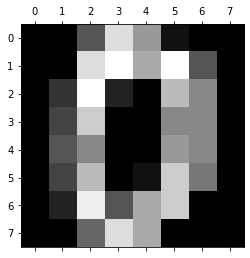

In [60]:
digits = load_digits()
print(digits['DESCR'])

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [28]:
# dividing dataset into X and y:
digit_data = digits.data
digit_target = digits.target

---

## Task 1:

In [29]:
clf = DecisionTreeClassifier()
answer_1 = sklearn.model_selection.cross_val_score(clf, digit_data, digit_target, cv=10).mean()
answer_1

0.8302513966480447

---

## Task 2:

In [31]:
clf2 = BaggingClassifier(n_estimators=100)
answer_2 = sklearn.model_selection.cross_val_score(clf2, digit_data, digit_target, cv=10).mean()
answer_2

0.921489757914339

---

## Task 3:

In [39]:
total_number_of_features = len(digits.feature_names)
clf3 = BaggingClassifier(n_estimators=100, max_features=int(math.sqrt(total_number_of_features)))
answer_3 = sklearn.model_selection.cross_val_score(clf2, digit_data, digit_target, cv=10).mean()
answer_3

0.9253848541278711

---

## Task 4:

In [53]:
total_number_of_features = len(digits.feature_names)
base = DecisionTreeClassifier(max_features=int(math.sqrt(total_number_of_features)), random_state=0)
clf4 = BaggingClassifier(base_estimator=base, n_estimators=100)
answer_4 = cross_val_score(clf4, digit_data, digit_target, cv=10).mean()
answer_4

0.9471229050279328

---

## Task 5:

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму **Random Forest**, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. 

In [52]:
total_number_of_features = len(digits.feature_names)
clf5 = RandomForestClassifier(max_features=int(math.sqrt(total_number_of_features)), random_state=0)
answer_5 = cross_val_score(clf5, digit_data, digit_target, cv=10).mean()
answer_5

0.9476939788950961

So, we could observe that the results from Task 4 and Task 5 are pretty similar because it is the same way of calculation only represented in different ways. However, why are they not identical tho? It is due to random selection of features and samples from dataset which might lead to different results in each run of the same code. This could be handled via adding *random_state* parameter.

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

1) качество классификации от количества деревьев:

Text(0.5, 1.0, 'RandomForest score')

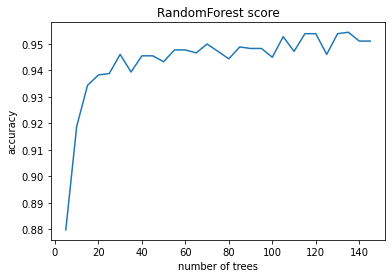

In [63]:
number_of_estimators = np.arange(5, 150, 5)

total_number_of_features = len(digits.feature_names)
feature_number = int(math.sqrt(total_number_of_features))
results = []

for n_estimator in number_of_estimators:
    clf5 = RandomForestClassifier(max_features=feature_number, n_estimators = n_estimator)
    results.append(cross_val_score(clf5, digit_data, digit_target, cv=10).mean())
    
plt.plot(number_of_estimators, results)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')

- Случайный леса не переобучается с ростом количества деревьев.
- С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
- При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.

2) качество классификации от количества признаков:

Text(0.5, 1.0, 'RandomForest score with n_estimators=100')

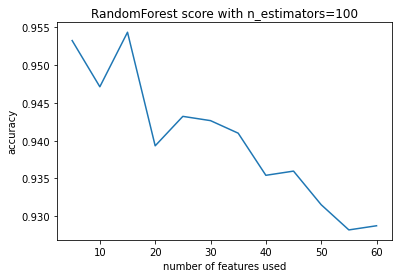

In [64]:
number_of_features = np.arange(5, len(digits.feature_names), 5)
results = []

for n_feature in number_of_features:
    clf5 = RandomForestClassifier(max_features=n_feature, n_estimators = 100)
    results.append(cross_val_score(clf5, digit_data, digit_target, cv=10).mean())
    
plt.plot(number_of_features, results)
plt.xlabel('number of features used')
plt.ylabel('accuracy')
plt.title('RandomForest score with n_estimators=100')

- При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

3) качество классификации от ограничений на глубину дерева:

Text(0.5, 1.0, 'RandomForest score with n_estimators=100 and max_features=')

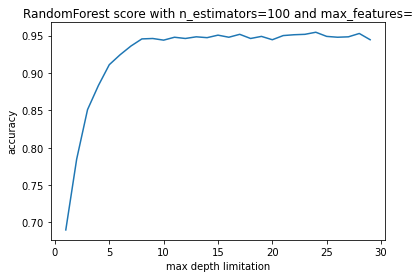

In [65]:
depths = np.arange(1, 30, 1)
results = []

total_number_of_features = len(digits.feature_names)
feature_number = int(math.sqrt(total_number_of_features))

for depth in depths:
    clf5 = RandomForestClassifier(max_features=feature_number, n_estimators = 100, max_depth=depth)
    results.append(cross_val_score(clf5, digit_data, digit_target, cv=10).mean())
    
plt.plot(depths, results)
plt.xlabel('max depth limitation')
plt.ylabel('accuracy')
plt.title('RandomForest score with n_estimators=100 and max_features=')

- При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).